# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px; padding:20px;">TP: DBSCAN Algorithm</p>
   <a id='top'></a>  
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"></p>   

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on their density in the feature space, without the need to predefine the number of clusters


<img src="DBscan_img.png" alt="Nom de l'image">

In this work, we'll explore the application of DBSCAN and how powerful it can be in clustering highly complex data.

<span style="color:red">**Note** : Please refrain from using any AI assistance, but feel free to access any online  documentation</span>.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Exercice 1 : DBSCAN vs K-means**
In this exercise, we will examine the performance of the two popular clustering algorithms and determine which one to use when dealing with complex (noisy) data

1- Generate moon-shaped data using the `make_moons` function and plot it.


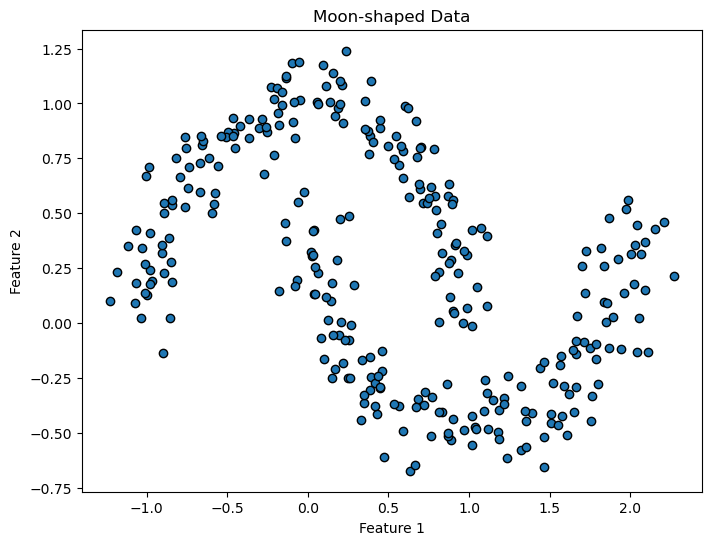

In [20]:
from sklearn.datasets import make_moons

# Générer des données en forme de lune
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Afficher les données sur un graphique
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon-shaped Data')
plt.show()

2- Normalize the Data 

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_norm = scaler.fit_transform(X)

3 - Apply `DBSCAN` , `Kmeans`

`Kmeans`

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Elbow Method')

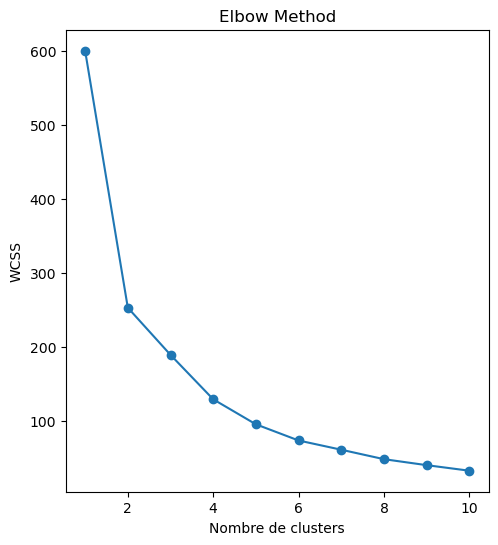

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_norm, kmeans.labels_))

# Afficher le graphique du coude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

Le nombre de cluster est `4` 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


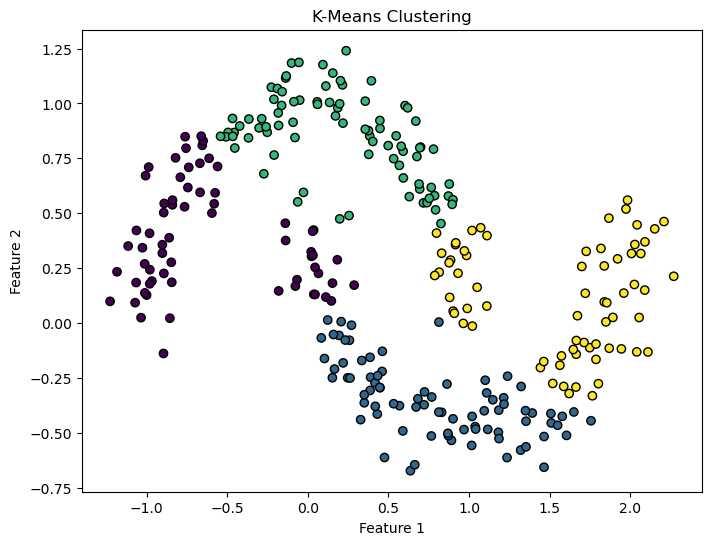

In [31]:
optimal_clusters = 4  

# Appliquer K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_norm)
y_kmeans = kmeans.predict(X_norm)

# Afficher les clusters trouvés
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k')
centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

`DBSCAN`

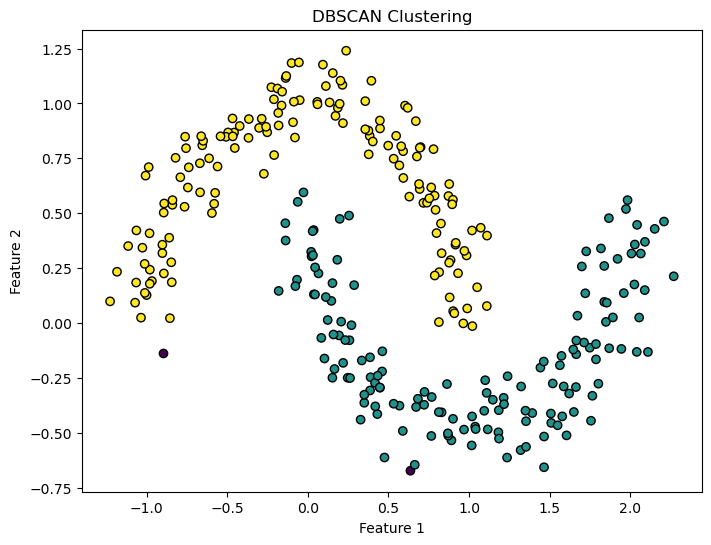

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_norm)

# Afficher les clusters trouvés
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

4 - Plot the results and compare them 

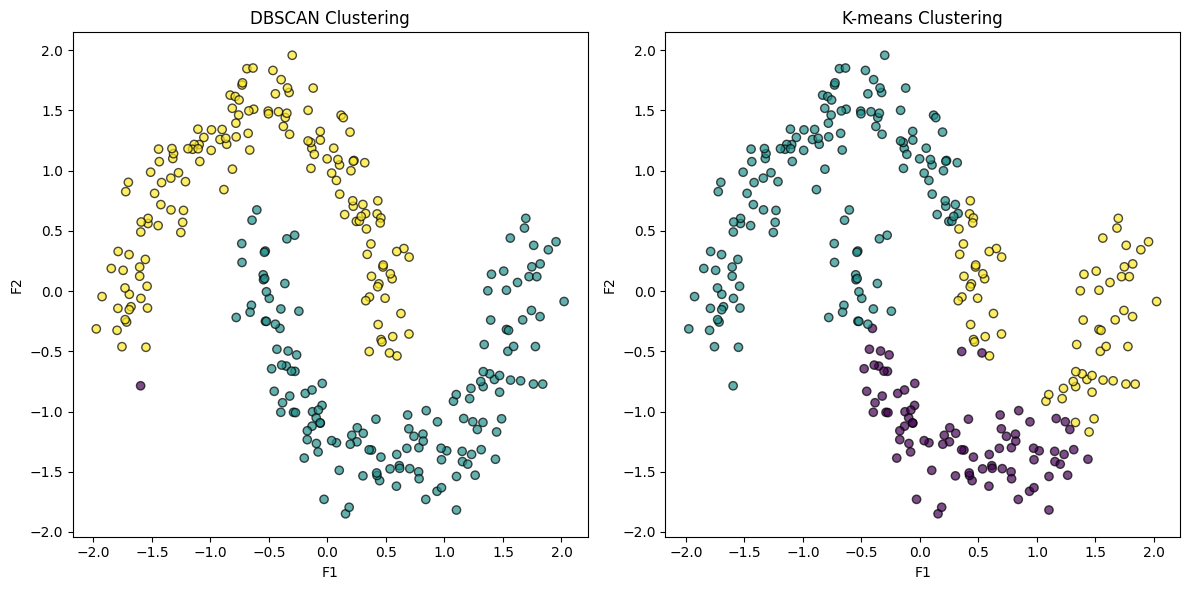

## **Exercice 2 : Applying DBSCAN**
We will be working on a Mall Customers dataset and using DBSCAN to perform clustering. The purpose of this is to identify how to segment customers by analyzing the features in the dataset

1 - Import the data form `Mall_Customers.csv` and perform the EDA

In [35]:
data = pd.read_csv('Mall_Customers.csv')

In [37]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2 - Select the features that may help in segmenting the customers, plot them, and perform the transformations.

In [41]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [49]:
X_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

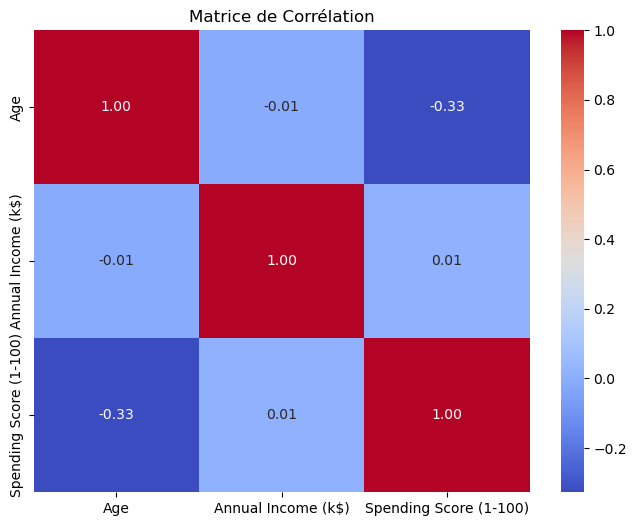

In [50]:
import seaborn as sns

# Calculer la matrice de corrélation
corr_matrix = X_data.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [42]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

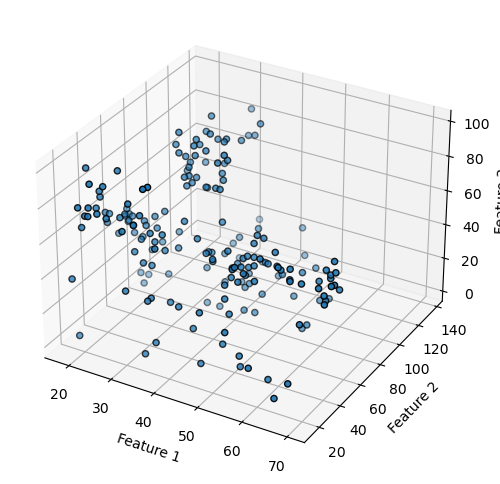

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolors='k')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

3 - Normalize the selected features

In [45]:
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)

In [46]:
X_norm

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

4 - Apply **DBSCAN**  <br>
*try differnet values of `EPS` and `MinPts`*

Text(0.5, 0.92, 'DBSCAN Clustering')

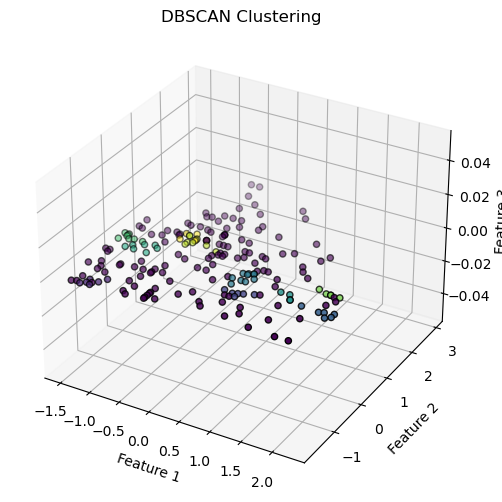

In [52]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_norm)

# Afficher les clusters trouvés
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[:, 0], X_norm[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('DBSCAN Clustering')

In [53]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1,  2, -1,  1,  2, -1,  2, -1,  2, -1, -1,  2,
       -1, -1,  2,  3,  4,  4,  4,  5, -1, -1,  5,  3,  4, -1, -1,  3,  5,
        3, -1,  5, -1,  3, -1,  6,  3, -1, -1,  5,  3,  5,  3,  6,  6,  3,
       -1,  5,  3,  6,  7, -1,  7,  7,  7,  6, -1,  6,  6,  6,  7, -1, -1,
       -1, -1, -1, -1, -1, -1,  8, -1, -1, -1,  8, -1, -1, -1,  8, -1,  9,
       -1,  8, -1,  8, -1,  9, -1,  9, -1, -1, -1,  8, -1,  9, -1, -1, -1,
       -1, -1, -1, -1,  8, -1,  8, -1,  9, -1,  9, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

**Fin.**